## Ответы на вопросы из технического задания

### Импорт данных и предварительная обработка

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("data.xlsx")
df

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


In [95]:
del df["Unnamed: 5"]
df

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   document        709 non-null    object 
 6   receiving_date  607 non-null    object 
dtypes: float64(2), object(5)
memory usage: 40.1+ KB


In [97]:
stats = df[df["status"].str.contains(r"(\b[А-Яа-я]+\s\d{4}\b)")]
stats

C:\Users\supercilious\AppData\Local\Temp\ipykernel_26520\4280626932.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  stats = df[df["status"].str.contains(r"(\b[А-Яа-я]+\s\d{4}\b)")]


,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
129,NaN,NaN,Июнь 2021,NaN,NaN,NaN,NaN
258,NaN,NaN,Июль 2021,NaN,NaN,NaN,NaN
369,NaN,NaN,Август 2021,NaN,NaN,NaN,NaN
484,NaN,NaN,Сентябрь 2021,NaN,NaN,NaN,NaN
594,NaN,NaN,Октябрь 2021,NaN,NaN,NaN,NaN


In [98]:
may_2021 = df.iloc[1:129]
june_2021 = df.iloc[130:258]
july_2021 = df.iloc[259:369]
august_2021 = df.iloc[370:484]
september_2021 = df.iloc[485:594]
october_2021 = df.iloc[595:731]

### 1)

Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен

In [114]:
july_profit = july_2021[july_2021['status'] == "ОПЛАЧЕНО"]['sum'].sum()
print(f'Сумма всех оплаченых транзакций в июле = {july_profit:.2f}')

Сумма всех оплаченых транзакций в июле = 859896.47


### 2)

Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте на графике:

В данном случае рассматриваются только те поступления, которые имеют статус `ОПЛАЧЕНО`, без `ВНУТРЕННИЙ`, `ПРОСРОЧЕНО` и `В РАБОТЕ`

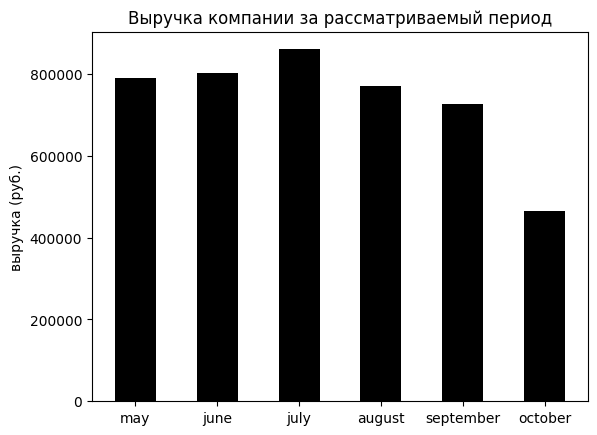

In [100]:
month = {"may": may_2021, "june": june_2021, "july": july_2021,
         "august": august_2021, "september": september_2021, "october": october_2021}
profits = []
for k, df in month.items():
    profits.append(df[df['status'] == "ОПЛАЧЕНО"]['sum'].sum())

plt.bar(month.keys(), profits, color='k', width=0.5)
plt.ylabel("выручка (руб.)")
plt.title("Выручка компании за рассматриваемый период")
plt.show()

Если же рассматривать все возможные статусы в графе статус, то график будет выглядеть следующим образом:

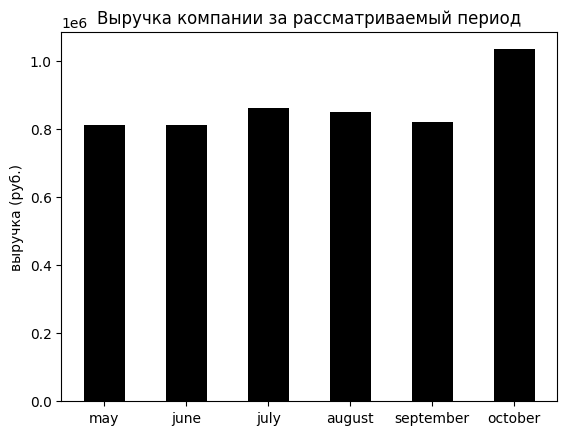

In [116]:
profits = []
for k, df in month.items():
    profits.append(df['sum'].sum())

plt.bar(month.keys(), profits, color='k', width=0.5)
plt.ylabel("выручка (руб.)")
plt.title("Выручка компании за рассматриваемый период")
plt.show()

### 3)

Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

Опять же, рассматривается только статус `ОПЛАЧЕНО`

In [101]:
most_sales = september_2021[september_2021['status'] == "ОПЛАЧЕНО"].groupby("sale")["sum"].sum().sort_values(ascending=False)
print(f"Наибольшую прибыль привлек: {most_sales.index[0]} \nCо значением: {most_sales.iloc[0]:.2f}")

Наибольшую прибыль привлек: Смирнов 
Cо значением: 205258.30


Если же рассматривать все возможные статусы то результат будет следующим:

In [117]:
most_sales = september_2021.groupby("sale")["sum"].sum().sort_values(ascending=False)
print(f"Наибольшую прибыль привлек: {most_sales.index[0]} \nCо значением: {most_sales.iloc[0]:.2f}")

Наибольшую прибыль привлек: Смирнов 
Cо значением: 221525.70


### 4)

Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [102]:
sales_type = october_2021.groupby("new/current")['client_id'].count().sort_values(ascending=False)
print(f"В октябре месяце преобладали: {sales_type.index[0]} \nСо значением: {sales_type.iloc[0]}")

В октябре месяце преобладали: текущая 
Со значением: 99


### 5)

Сколько оригиналов договора по майским сделкам было получено в июне 2021?

Если я правильно понял суть задания, то требуется посчитать количество оригиналов, отданных в июне, по сделке, совершенной в мае. При этом без разницы, сделка новая или текущая

In [103]:
may_2021 = may_2021.iloc[1:,:]
may_2021

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00
...,...,...,...,...,...,...,...
124,277.0,4623.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-14 00:00:00
125,281.0,4488.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00
126,284.0,8903.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-07-27 00:00:00
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31 00:00:00


In [110]:
may_2021.loc[:, "receiving_date"] = pd.to_datetime(may_2021["receiving_date"])

In [113]:
original_count = may_2021[(may_2021["receiving_date"].dt.month == 6) & (may_2021["document"] == 'оригинал')].count()
print(f"Всего было получено {original_count.iloc[0]} договоров в июне за майские сделки")

Всего было получено 76 договоров в июне за майские сделки
